In [27]:

# train autoencoder for classification with with compression in the bottleneck layer
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
import pandas as pd
from sklearn import preprocessing



In [28]:
# define dataset
df= pd.read_csv("D:\\multiomics\\Data\\processed\\cnv_snv_meth_mRNA_miRNA_rppa.csv")
df

,Unnamed: 0,ENSG00000197429.9_cnv,ENSG00000243480.6_cnv,ENSG00000116815.14_cnv,ENSG00000198162.11_cnv,ENSG00000155761.12_cnv,ENSG00000162630.5_cnv,ENSG00000259823.4_cnv,ENSG00000179915.19_cnv,ENSG00000176204.12_cnv,...,XPF_rppa,XRCC1_rppa,YAP_rppa,YAP_pS127_rppa,YB1_rppa,YB1_pS102_rppa,YTHDF3_rppa,ZAP.70_rppa,ZEB1_rppa,Outcome
0,G9-6384-01A,0,0,0,0,0,0,0,0,0,...,-0.207110,-0.242910,0.292070,0.275100,-0.199070,-0.107370,-0.167776,-0.203769,-0.167882,Complete Remission/Response
1,FC-7961-01A,0,0,0,0,0,0,0,0,-1,...,-0.036506,-0.069096,0.106790,0.628770,0.104430,-0.245980,0.020453,-1.011840,0.040223,Complete Remission/Response
2,WW-A8ZI-01A,0,0,0,0,0,0,-1,0,0,...,-0.104943,-0.154240,0.088005,-0.168160,-0.115050,-0.084890,0.456605,-1.009956,-0.478152,Complete Remission/Response
3,EJ-7786-01A,0,0,0,0,0,0,0,0,0,...,-0.019285,-0.293520,-0.070832,0.320280,-0.298190,-0.087120,-0.466569,-0.754495,-0.164106,Complete Remission/Response
4,ZG-A9KY-01A,1,0,0,0,0,0,0,0,0,...,0.166896,0.282180,-0.017185,0.047953,-0.101760,0.006676,0.552021,2.354566,-0.253390,Stable Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,EJ-5495-01A,0,0,0,0,0,0,0,0,0,...,-0.020477,-0.092243,0.128320,0.599930,-0.386510,-0.337590,-0.212364,0.056534,-0.210540,Complete Remission/Response
271,G9-6367-01A,0,0,0,0,0,0,0,0,0,...,-0.071584,-0.258860,0.435450,0.208820,-0.136200,0.038401,-0.290379,-0.877670,-0.304782,Progressive Disease
272,EJ-A46G-01A,1,1,0,0,0,0,0,0,1,...,-0.127043,-0.005556,0.439390,0.843550,-0.188250,-0.085769,-0.223351,-0.172442,-0.249006,Complete Remission/Response
273,HI-7171-01A,0,0,-1,0,0,0,0,0,0,...,-0.086451,0.252410,0.063171,-0.246890,0.134580,-0.229700,-0.014123,-0.044849,-0.111227,Stable Disease


In [29]:
# Extract the first and last columns
first_column = df.iloc[:, 0]
last_column = df.iloc[:, -1]

# Normalize the columns excluding the first and last
min_max_scaler = preprocessing.MinMaxScaler()
df[df.columns[1:-1]] = min_max_scaler.fit_transform(df[df.columns[1:-1]])
#    df.iloc[:, ] = min_max_scaler.fit_transform(df.iloc[:, 1:-1])

# Reassign the first and last columns
df.iloc[:, 0] = first_column
df.iloc[:, -1] = last_column


In [30]:
df

,Unnamed: 0,ENSG00000197429.9_cnv,ENSG00000243480.6_cnv,ENSG00000116815.14_cnv,ENSG00000198162.11_cnv,ENSG00000155761.12_cnv,ENSG00000162630.5_cnv,ENSG00000259823.4_cnv,ENSG00000179915.19_cnv,ENSG00000176204.12_cnv,...,XPF_rppa,XRCC1_rppa,YAP_rppa,YAP_pS127_rppa,YB1_rppa,YB1_pS102_rppa,YTHDF3_rppa,ZAP.70_rppa,ZEB1_rppa,Outcome
0,G9-6384-01A,0.5,0.5,1.0,0.5,0.5,0.5,0.5,0.5,0.5,...,0.329286,0.337309,0.284823,0.377187,0.187839,0.330903,0.469180,0.358263,0.372060,Complete Remission/Response
1,FC-7961-01A,0.5,0.5,1.0,0.5,0.5,0.5,0.5,0.5,0.0,...,0.466715,0.444567,0.206801,0.460039,0.418366,0.229942,0.517699,0.155565,0.532721,Complete Remission/Response
2,WW-A8ZI-01A,0.5,0.5,1.0,0.5,0.5,0.5,0.0,0.5,0.5,...,0.411586,0.392026,0.198890,0.273348,0.251658,0.347277,0.630123,0.156037,0.132525,Complete Remission/Response
3,EJ-7786-01A,0.5,0.5,1.0,0.5,0.5,0.5,0.5,0.5,0.5,...,0.480587,0.306079,0.132003,0.387771,0.112552,0.345653,0.392163,0.220118,0.374975,Complete Remission/Response
4,ZG-A9KY-01A,1.0,0.5,1.0,0.5,0.5,0.5,0.5,0.5,0.5,...,0.630564,0.661333,0.154594,0.323975,0.261752,0.413972,0.654717,1.000000,0.306046,Stable Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,EJ-5495-01A,0.5,0.5,1.0,0.5,0.5,0.5,0.5,0.5,0.5,...,0.479627,0.430283,0.215867,0.453283,0.045467,0.163215,0.457687,0.423558,0.339127,Complete Remission/Response
271,G9-6367-01A,0.5,0.5,1.0,0.5,0.5,0.5,0.5,0.5,0.5,...,0.438458,0.327467,0.345201,0.361660,0.235593,0.437080,0.437578,0.189220,0.266370,Progressive Disease
272,EJ-A46G-01A,1.0,1.0,1.0,0.5,0.5,0.5,0.5,0.5,1.0,...,0.393783,0.483776,0.346861,0.510354,0.196058,0.346637,0.454855,0.366121,0.309430,Complete Remission/Response
273,HI-7171-01A,0.5,0.5,0.0,0.5,0.5,0.5,0.5,0.5,0.5,...,0.426482,0.642962,0.188433,0.254904,0.441267,0.241800,0.508786,0.398126,0.415798,Stable Disease


In [31]:
data = df.values
X, y = data[:, 1:-1], data[:, -1]

In [32]:
X.shape[1]

3518

In [33]:
y.shape

(275,)

In [34]:

import numpy as np
import tensorflow as tf

# Initialize all weights to zeros
initializer = tf.keras.initializers.Zeros()

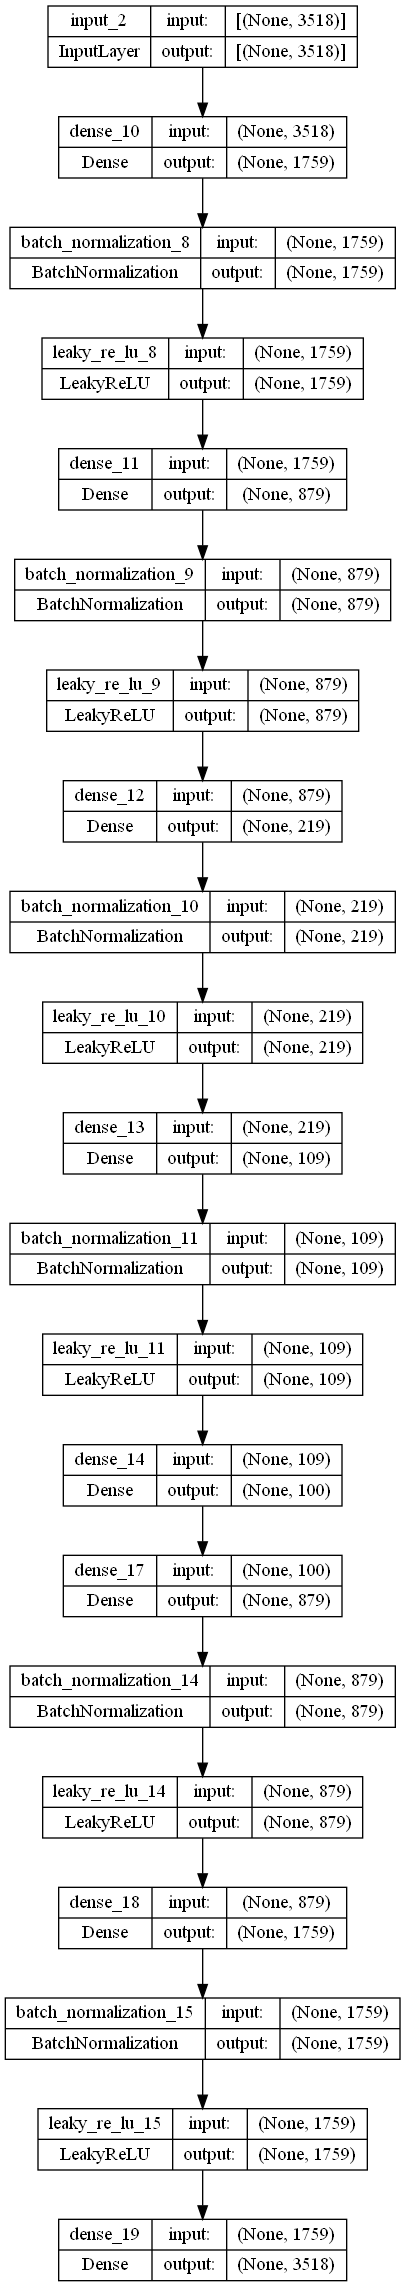

In [35]:
# number of input columns
n_inputs = X.shape[1]
# # split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs/2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs/4)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs/16)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs/32)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
n_bottleneck = 100
bottleneck = Dense(n_bottleneck)(e)
# define decoder, level 1
d = Dense(n_inputs/32)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# define decoder, level 2
d = Dense(n_inputs/16)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# define decoder, level 3
d = Dense(n_inputs/4)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 4
d = Dense(n_inputs/2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')
# plot the autoencoder
plot_model(model, 'autoencoder_compress.png', show_shapes=True)
# fit the autoencoder model to reconstruct input


In [36]:
# import numpy as np
# X_train_new = np.asarray(X_train, dtype= float)
# X_test_new = np.asarray(X_test, dtype= float)
# type(X_train)
# type(X_train_new)

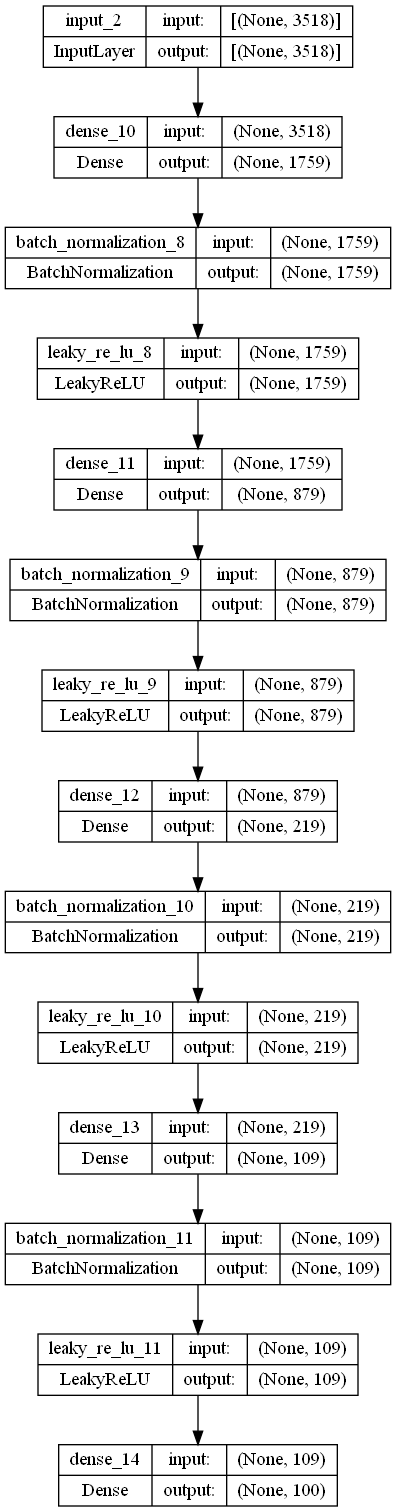

In [37]:
import tensorflow as tf
from tensorflow import keras
keras.utils.set_random_seed(0)




# history = model.fit(X_train_new, X_train_new, epochs=200, batch_size=16, verbose=2, validation_data=(X_test_new, X_test_new))
# # plot loss
# pyplot.plot(history.history['loss'], label='train')
# pyplot.plot(history.history['val_loss'], label='test')

# pyplot.legend()
# pyplot.show()

# # define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder_compress.png', show_shapes=True)

# Save model weights after training
#encoder.save_weights('autoencoder_weights.h5')




In [38]:
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef,roc_auc_score
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support
import random
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn import svm,tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb


In [39]:
AllPerformace = []

In [40]:
# save the encoder to file
#encoder.save('encoder.h5')
# Load model weights before using the model
encoder.load_weights('autoencoder_weights.h5')

In [41]:

X_encode = encoder.predict(X.astype(float))
y_encode = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
oversample = SMOTE(random_state=0)
X_encode, y_encode = oversample.fit_resample(X_encode, y_encode)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X_encode, y_encode):
    train_data, val_data = X_encode[train_index], X_encode[val_index]
    train_labels, val_labels = y_encode[train_index], y_encode[val_index]
    
   
    
    random.seed(0)
    model = AdaBoostClassifier(random_state= 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels,preds_proba,multi_class="ovr")

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['AdaBoost', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

9/9 [==============================] - 0s 14ms/step
Average Cross-Validation Accuracy: 0.70
Average Cross-Validation Precision: 0.76
Average Cross-Validation Recall: 0.70
Average Cross-Validation AUC-ROC: 0.88
Average Cross-Validation F1-Score: 0.70
Average Cross-Validation MCC-Score: 0.62


In [42]:
X_encode = encoder.predict(X.astype(float))
y_encode = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
oversample = SMOTE(random_state=0)
X_encode, y_encode = oversample.fit_resample(X_encode, y_encode)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X_encode, y_encode):
    train_data, val_data = X_encode[train_index], X_encode[val_index]
    train_labels, val_labels = y_encode[train_index], y_encode[val_index]
    

    
    random.seed(0)
    model = tree.DecisionTreeClassifier(random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels,preds_proba,multi_class="ovr")

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['DT', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

9/9 [==============================] - 0s 13ms/step
Average Cross-Validation Accuracy: 0.85
Average Cross-Validation Precision: 0.85
Average Cross-Validation Recall: 0.85
Average Cross-Validation AUC-ROC: 0.93
Average Cross-Validation F1-Score: 0.84
Average Cross-Validation MCC-Score: 0.80


In [43]:
X_encode = encoder.predict(X.astype(float))
y_encode = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
oversample = SMOTE(random_state=0)
X_encode, y_encode = oversample.fit_resample(X_encode, y_encode)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X_encode, y_encode):
    train_data, val_data = X_encode[train_index], X_encode[val_index]
    train_labels, val_labels = y_encode[train_index], y_encode[val_index]
    
    random.seed(0)
    model = GradientBoostingClassifier(random_state=0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels,preds_proba,multi_class="ovr")

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['GBM', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

9/9 [==============================] - 0s 15ms/step
Average Cross-Validation Accuracy: 0.96
Average Cross-Validation Precision: 0.96
Average Cross-Validation Recall: 0.96
Average Cross-Validation AUC-ROC: 1.00
Average Cross-Validation F1-Score: 0.96
Average Cross-Validation MCC-Score: 0.95


In [44]:
X_encode = encoder.predict(X.astype(float))
y_encode = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
oversample = SMOTE(random_state=0)
X_encode, y_encode = oversample.fit_resample(X_encode, y_encode)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X_encode, y_encode):
    train_data, val_data = X_encode[train_index], X_encode[val_index]
    train_labels, val_labels = y_encode[train_index], y_encode[val_index]
    
    random.seed(0)
    model = KNeighborsClassifier()
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels,preds_proba,multi_class="ovr")

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['KNN', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

9/9 [==============================] - 0s 13ms/step
Average Cross-Validation Accuracy: 0.87
Average Cross-Validation Precision: 0.89
Average Cross-Validation Recall: 0.87
Average Cross-Validation AUC-ROC: 0.97
Average Cross-Validation F1-Score: 0.86
Average Cross-Validation MCC-Score: 0.84


In [45]:
X_encode = encoder.predict(X.astype(float))
y_encode = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
oversample = SMOTE(random_state=0)
X_encode, y_encode = oversample.fit_resample(X_encode, y_encode)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X_encode, y_encode):
    train_data, val_data = X_encode[train_index], X_encode[val_index]
    train_labels, val_labels = y_encode[train_index], y_encode[val_index]
    
    random.seed(0)
    model = MLPClassifier(early_stopping=True,random_state=0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels,preds_proba,multi_class="ovr")

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['MLP', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

9/9 [==============================] - 0s 13ms/step
Average Cross-Validation Accuracy: 0.90
Average Cross-Validation Precision: 0.91
Average Cross-Validation Recall: 0.90
Average Cross-Validation AUC-ROC: 1.00
Average Cross-Validation F1-Score: 0.90
Average Cross-Validation MCC-Score: 0.88


In [46]:
X_encode = encoder.predict(X.astype(float))
y_encode = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
oversample = SMOTE(random_state=0)
X_encode, y_encode = oversample.fit_resample(X_encode, y_encode)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X_encode, y_encode):
    train_data, val_data = X_encode[train_index], X_encode[val_index]
    train_labels, val_labels = y_encode[train_index], y_encode[val_index]
    
    random.seed(0)
    model = GaussianNB()
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels,preds_proba,multi_class="ovr")

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['NB', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

9/9 [==============================] - 0s 14ms/step
Average Cross-Validation Accuracy: 0.57
Average Cross-Validation Precision: 0.67
Average Cross-Validation Recall: 0.57
Average Cross-Validation AUC-ROC: 0.85
Average Cross-Validation F1-Score: 0.57
Average Cross-Validation MCC-Score: 0.46


In [47]:
X_encode = encoder.predict(X.astype(float))
y_encode = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
oversample = SMOTE(random_state=0)
X_encode, y_encode = oversample.fit_resample(X_encode, y_encode)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X_encode, y_encode):
    train_data, val_data = X_encode[train_index], X_encode[val_index]
    train_labels, val_labels = y_encode[train_index], y_encode[val_index]

    
    random.seed(0)
    model = RandomForestClassifier(random_state=0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels,preds_proba,multi_class="ovr")

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['RF', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

9/9 [==============================] - 0s 13ms/step
Average Cross-Validation Accuracy: 0.98
Average Cross-Validation Precision: 0.98
Average Cross-Validation Recall: 0.98
Average Cross-Validation AUC-ROC: 1.00
Average Cross-Validation F1-Score: 0.98
Average Cross-Validation MCC-Score: 0.97


In [48]:
X_encode = encoder.predict(X.astype(float))
y_encode = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
oversample = SMOTE(random_state=0)
X_encode, y_encode = oversample.fit_resample(X_encode, y_encode)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X_encode, y_encode):
    train_data, val_data = X_encode[train_index], X_encode[val_index]
    train_labels, val_labels = y_encode[train_index], y_encode[val_index]
    
    random.seed(0)
    model = svm.SVC(probability=True)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels,preds_proba,multi_class="ovr")

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['SVM', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

9/9 [==============================] - 0s 12ms/step
Average Cross-Validation Accuracy: 0.95
Average Cross-Validation Precision: 0.95
Average Cross-Validation Recall: 0.95
Average Cross-Validation AUC-ROC: 1.00
Average Cross-Validation F1-Score: 0.95
Average Cross-Validation MCC-Score: 0.93


In [49]:
X_encode = encoder.predict(X.astype(float))
y_encode = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
oversample = SMOTE(random_state=0)
X_encode, y_encode = oversample.fit_resample(X_encode, y_encode)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X_encode, y_encode):
    train_data, val_data = X_encode[train_index], X_encode[val_index]
    train_labels, val_labels = y_encode[train_index], y_encode[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,
                                      max_depth=5,
                                      n_estimators=5000,
                                      subsample=0.5,
                                      colsample_bytree=0.5,
                                      eval_metric='auc',
                                      verbosity=1)
    eval_set = [(val_data, val_labels)]
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels,preds_proba,multi_class="ovr")

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['xGB', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

9/9 [==============================] - 0s 13ms/step
Average Cross-Validation Accuracy: 0.96
Average Cross-Validation Precision: 0.97
Average Cross-Validation Recall: 0.96
Average Cross-Validation AUC-ROC: 1.00
Average Cross-Validation F1-Score: 0.96
Average Cross-Validation MCC-Score: 0.95


In [50]:
AllPerformace = pd.DataFrame(AllPerformace,columns = ['Model','Accuracy','AUC-ROC','Precision','Recall','F1','MCC'])

In [51]:
AllPerformace.to_csv('10ModelsTreatmentAEWithSmote.csv', index=False)


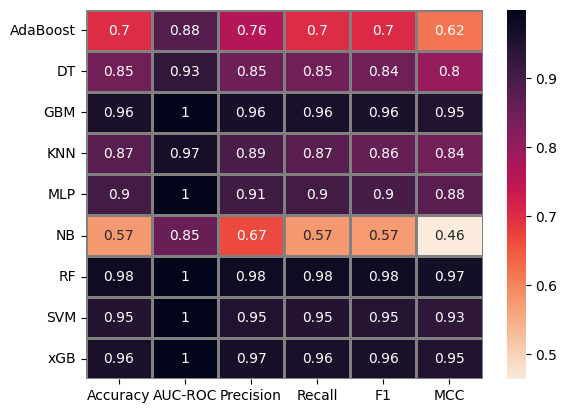

In [52]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import rcParams
models = AllPerformace.iloc[:,0]
AllPerformace = AllPerformace.iloc[:,1:11]
sns.heatmap(AllPerformace, 
            xticklabels= AllPerformace.columns, 
            yticklabels= models,
            cmap='rocket_r',
            linewidth=1,
            linecolor='gray',annot=True
           )

plt.savefig('10ModelsTreatmentAEWithSmote.jpg',dpi=600,bbox_inches = 'tight');